In [113]:
import os
import csv
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Columns:
# Date,Open,High,Low,Close,Volume,OpenInt
# 2008-03-28,43.64,43.64,43.64,43.64,231,0

def pandas_csv_output():
    '''
    combines the txt files and outputs as csv
    '''
    
    content_dict = {}
    temp = []
    # txt_search_list = ['aadr.us.txt', 'aaxj.us.txt'] #DEBUG
    txt_search_list = os.listdir('./dataset/ETFs')
    if len(txt_search_list) > 0:
        index = 0
        for each_txt in txt_search_list:
            path = 'dataset/ETFs/'+each_txt
            # with open(path, 'r') as f:
            #     content_string_with_header = str(f.read())
            dict = csv.DictReader(open(path))
            for i in dict:
                #Date,Open,High,Low,Close,Volume,OpenInt
                content_dict[index] = {
                    'etf': each_txt.split('.')[0],
                    'Date': i['Date'],
                    'Open': i['Open'],
                    'High': i['High'],
                    'Low': i['Low'],
                    'Close': i['Close'],
                    'Volume': i['Volume'],
                    'OpenInt': i['OpenInt']
                }
                index+=1
        df = pd.DataFrame.from_dict(
            content_dict,
            orient = 'index',
            columns = ['etf', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'])
        # print(df.head(3))\
    else: print('listdir didn\'t output anything')
    data.to_csv('data.csv')

    return


In [3]:
def pandas_output():
    print('reading data')
    s = time.time()
    df = pd.read_csv('data.csv')
    print("time to load: {} mins".format((time.time()-s)/60))
    return df

In [87]:
data = pandas_output()
data = data.drop(axis=1, columns=['Unnamed: 0','OpenInt'])
data['ratio'] = data['Close']/data['Volume']
data['difference_OC'] = data['Open'] - data['Close']
data.shape

reading data
time to load: 0.04134292999903361 mins


(2565578, 9)

In [88]:
data.describe()

,Open,High,Low,Close,Volume,ratio,difference_OC
count,2.565578e+06,2.565578e+06,2.565578e+06,2.565578e+06,2.565578e+06,2.565578e+06,2.565578e+06
mean,2.246837e+03,2.360110e+03,2.152194e+03,2.239545e+03,1.555495e+06,inf,7.291760e+00
std,1.710631e+05,1.803383e+05,1.637205e+05,1.707775e+05,1.192350e+07,NaN,1.129733e+04
min,0.000000e+00,2.598000e-01,0.000000e+00,2.472000e-01,0.000000e+00,2.743964e-09,-4.680000e+06
25%,2.263600e+01,2.276722e+01,2.248300e+01,2.262700e+01,9.226000e+03,1.397814e-04,-1.430000e-01
50%,3.518900e+01,3.542900e+01,3.491100e+01,3.517600e+01,4.651500e+04,7.627480e-04,0.000000e+00
75%,5.632300e+01,5.664200e+01,5.595500e+01,5.631400e+01,2.487000e+05,4.163764e-03,1.420000e-01
max,3.411600e+07,3.715200e+07,3.369600e+07,3.530400e+07,1.519430e+09,inf,4.765000e+06


In [89]:
unique_etf = data['etf'].unique()
len(unique_etf)

1344

In [90]:
data.head(3)

,etf,Date,Open,High,Low,Close,Volume,ratio,difference_OC
0,aadr,2010-07-21,24.333,24.333,23.946,23.946,43321,0.000553,0.387
1,aadr,2010-07-22,24.644,24.644,24.362,24.487,18031,0.001358,0.157
2,aadr,2010-07-23,24.759,24.759,24.314,24.507,8897,0.002755,0.252


In [141]:
[print(i) for i in data['etf'].unique()]

aadr
aaxj
acim
actx
acwf
acwi
acwv
acwx
adra
adrd
adre
adru
afk
agf
agg
agnd
agq
agz
agzd
aia
airr
ald
alfa
alts
amj
amjl
amlp
amu
angl
aoa
aok
aom
aor
argt
asea
ashr
ashs
atmp
ause
axjl
axjv
ayt
bab
bal
bbh
bbp
bbrc
bcm
bdcl
bdcs
bdd
bfor
bib
bick
bil
bis
biv
bizd
bjk
bkf
bkln
blv
bnd
bndx
bno
boil
bom
bond
braq
brf
brzu
bsch
bsci
bscj
bsck
bscl
bscm
bscn
bsco
bsjh
bsji
bsjj
bsjk
bsjl
bsjm
bsv
btal
bwv
bwx
bwz
byld
bzf
bzq
cafe
cane
cape
carz
cbnd
cbon
cefl
cew
cgw
chau
chep
chie
chii
chim
chiq
chix
choc
ciu
cjnk
cly
cmbs
cmdt
cmf
cn
cnda
cntr
cnxt
cny
comt
copx
corn
corp
cow
cper
cpi
cqqq
crbn
cred
croc
crop
csd
csj
csm
ctnn
cupm
cure
cut
cvy
cwb
cwi
cyb
cza
dag
dba
dbap
dbaw
dbb
dbbr
dbc
dbe
dbef
dbem
dbeu
dbez
dbgr
dbjp
dbko
dbmx
dbo
dbp
dbs
dbuk
dbv
dcng
ddg
ddm
ddp
def
dem
des
dew
dfe
dfj
dgaz
dgl
dgld
dgp
dgre
dgro
dgrs
dgrw
dgs
dgt
dgz
dhs
dia
dig
dim
dirt
div
djci
djp
dln
dls
dnl
dno
dod
dog
dol
don
doo
dpk
drip
drn
drr
drv
drw
dsi
dslv
dsum
dtd
dth
dtn
dto
dug
dust
dvhl
dvy
d

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

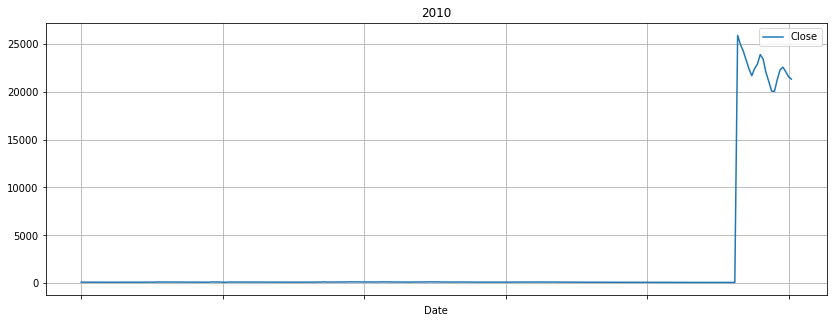

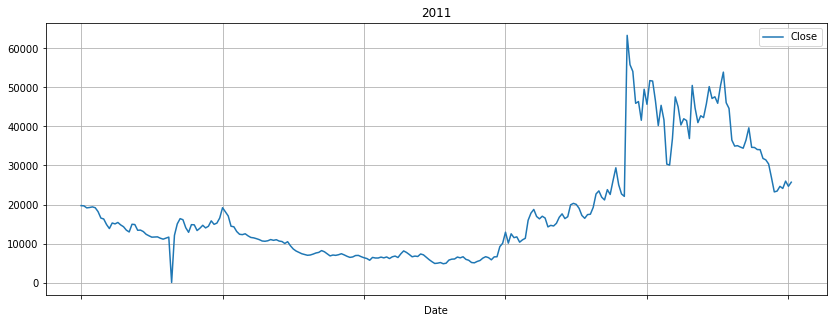

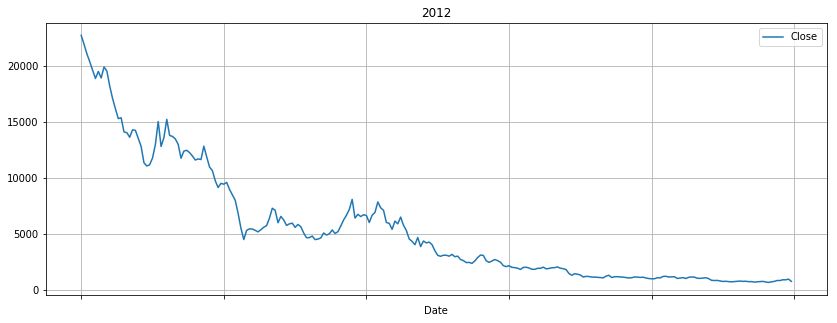

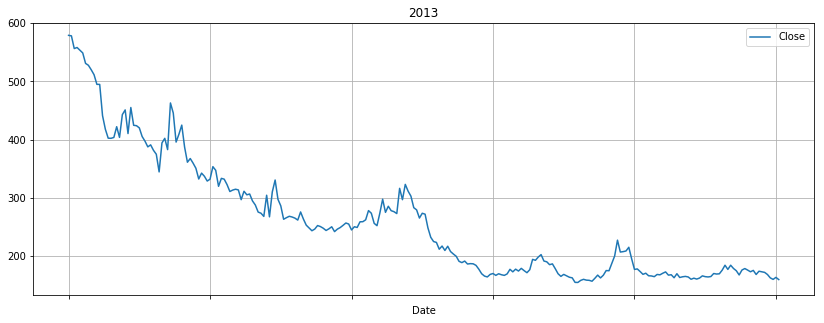

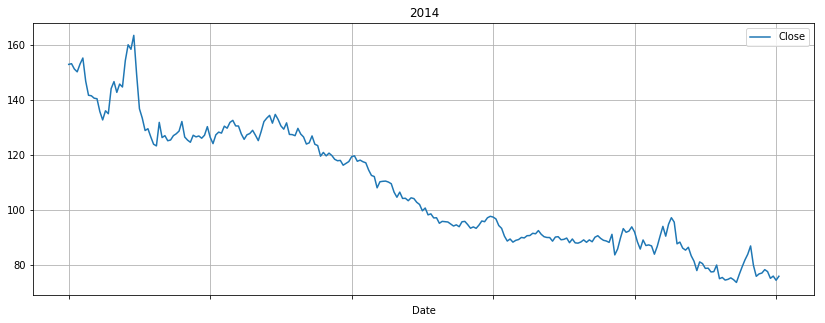

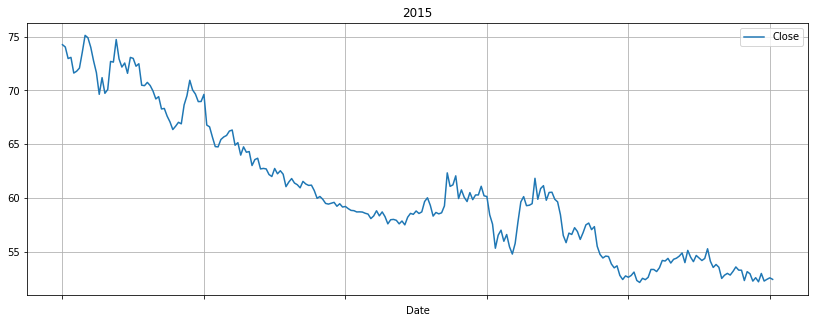

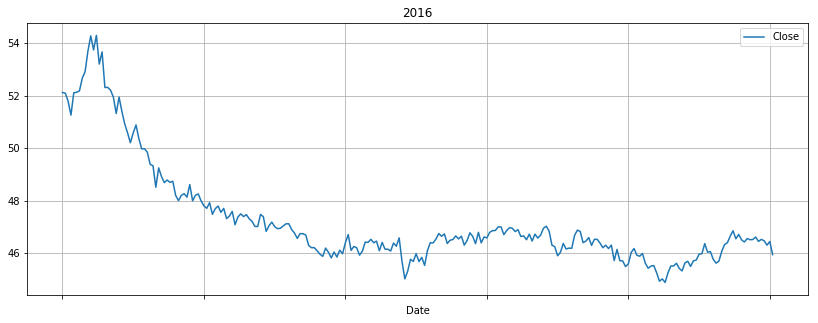

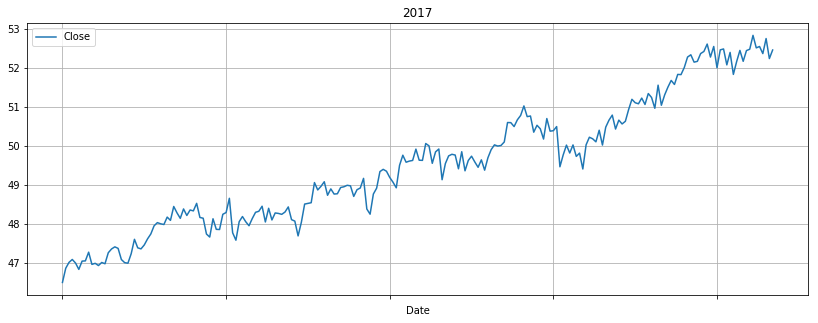

In [103]:
for i in [2010,2011,2012,2013,2014,2015,2016,2017]:
    fig, ax = plt.subplots()
    
    temp = data[(data['Date'] > '{}-01-01'.format(i)) & (data['Date'] < '{}-01-01'.format(i+1))]
    temp.groupby(by='Date').mean()['Close'].plot(
        title = i,
        grid=True,
        legend = True,
        figsize=(14,5)
    )

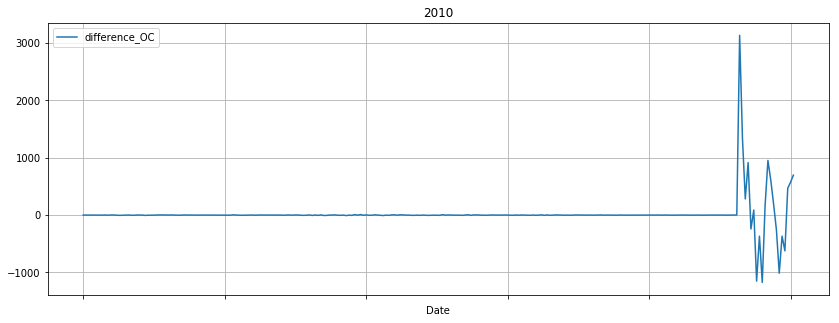

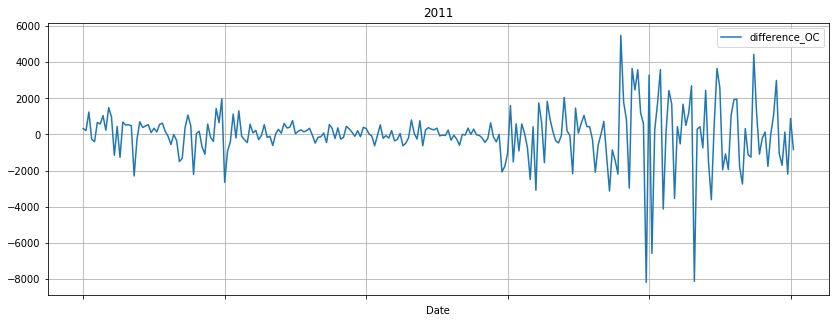

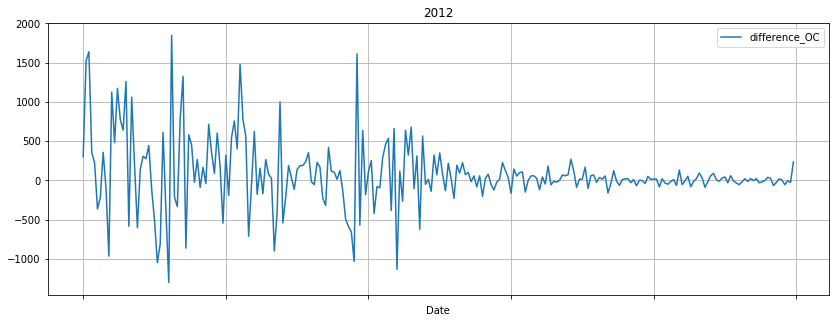

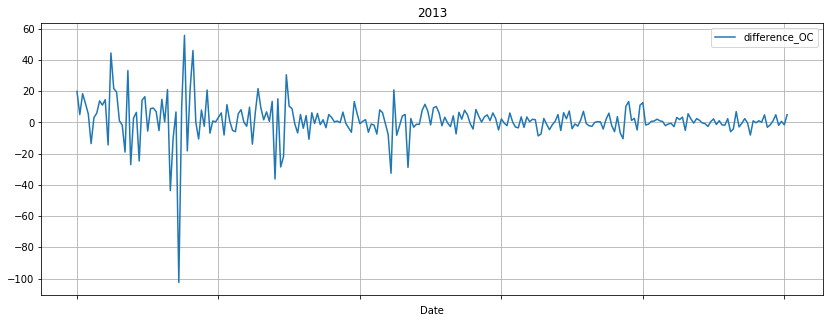

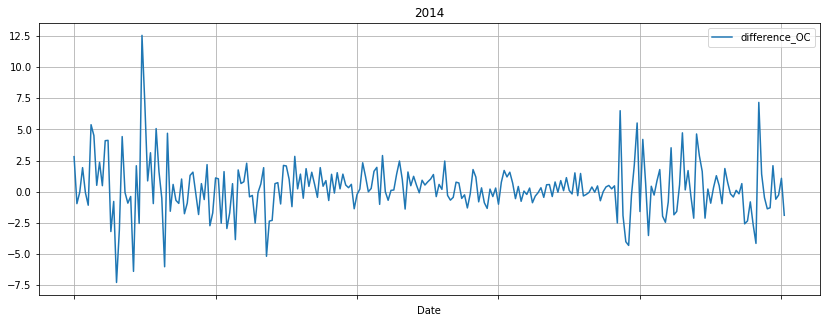

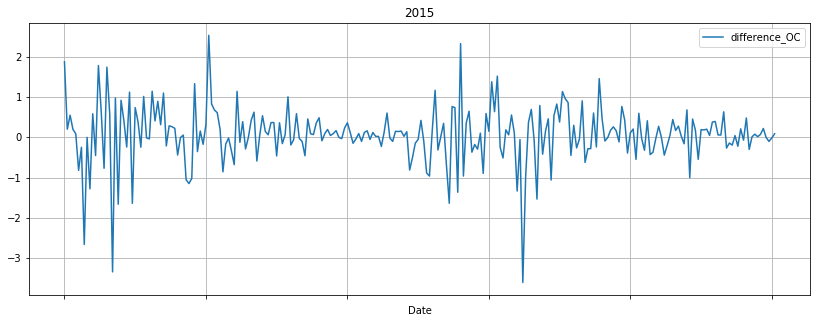

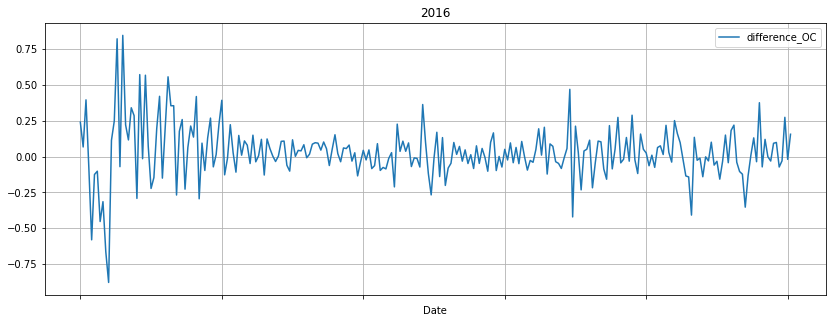

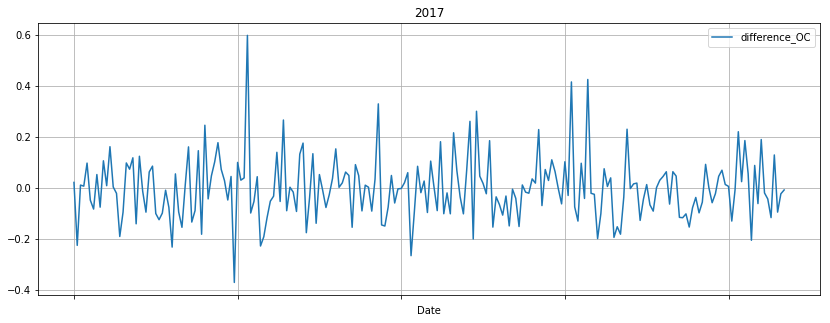

In [94]:
for i in [2010,2011,2012,2013,2014,2015,2016,2017]:
    fig, ax = plt.subplots()
    
    temp = data[(data['Date'] > '{}-01-01'.format(i)) & (data['Date'] < '{}-01-01'.format(i+1))]
    temp.groupby(by='Date').mean()['difference_OC'].plot(
        title = i,
        grid=True,
        legend = True,
        figsize=(14,5)
    )
    

In [ ]:
X = np.array([i for i in range(len(data.groupby(by='Date').mean().index))]).reshape(-1, 1)
y = data.groupby(by='Date').mean()['Close']
clf = BayesianRidge(compute_score=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

clf.fit(X_train, y_train)
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Text(0.5,1,'scatterplot of data with blue regression line')

Text(0.5,0,'date')

Text(0,0.5,'average closing $')

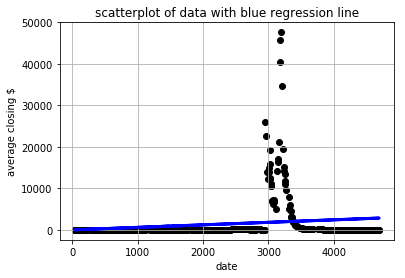

In [139]:
pred = clf.predict(X_test)
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())
plt.grid(True)
plt.title("scatterplot of data with blue regression line")
plt.xlabel('date')
plt.ylabel('average closing $')
plt.show()

In [143]:
X = np.array([i for i in range(len(data[data['etf']=='spy'].groupby(by='Date').mean().index))]).reshape(-1, 1)
y = data[data['etf']=='spy'].groupby(by='Date').mean()['Close']
clf = BayesianRidge(compute_score=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

clf.fit(X_train, y_train)
print("Accuracy: {}".format(clf.score(X_test, y_test)))

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

Accuracy: 0.6988988598892807


Text(0.5,1,'scatterplot of data with blue regression line')

Text(0.5,0,'date')

Text(0,0.5,'average closing $')

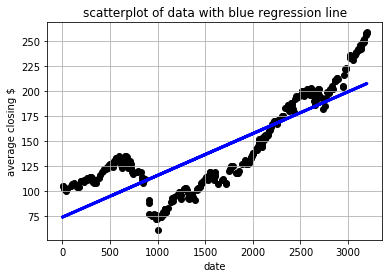

In [144]:
pred = clf.predict(X_test)
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())
plt.grid(True)
plt.title("scatterplot of data with blue regression line")
plt.xlabel('date')
plt.ylabel('average closing $')
plt.show()

In [128]:
X = np.array([i for i in range(len(data.groupby(by='Date').mean().index))]).reshape(-1, 1)
y = data.groupby(by='Date').mean()['difference_OC']
clf = BayesianRidge(compute_score=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

clf.fit(X_train, y_train)
print("Accuracy: {}".format(clf.score(X_test, y_test)))

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

Accuracy: -0.0036451141192916925
